# Part 1. Data Processing:

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

In [2]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

# 1. Explore the Dataset:

In [3]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

# 2. Handle Missing Data:

In [5]:
# Check for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Observation : There is no missing value.

# 3. Handle Outliers :

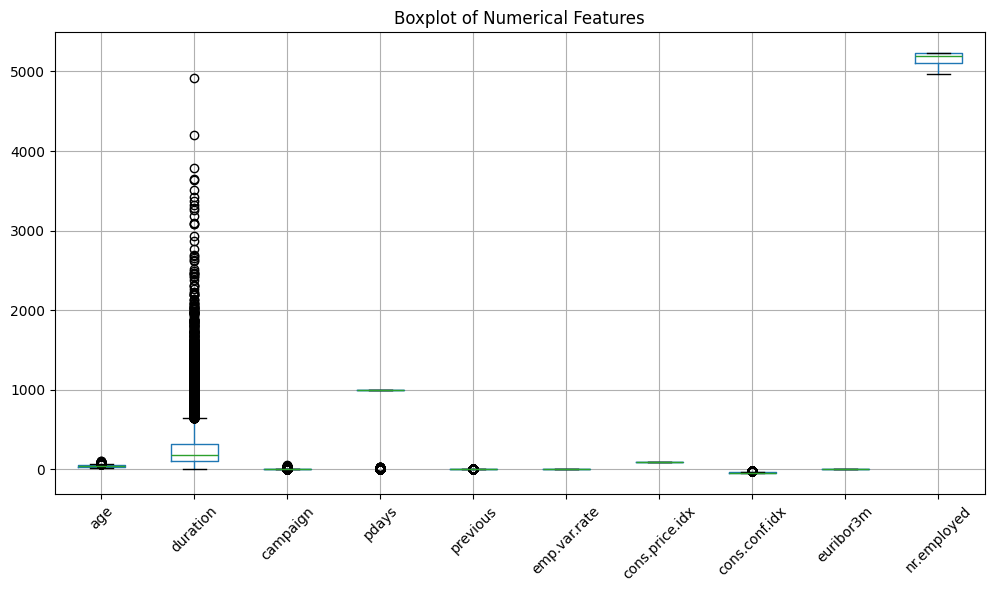

In [6]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical features
plt.figure(figsize=(12, 6))
data[numerical_cols].boxplot(rot=45)  # Rotate labels for better readability
plt.title("Boxplot of Numerical Features")
plt.show()

## Observation : There are some outliers in duration, pdays, but since the research paper does not explicitly mention removing outliers in the data preprocessing steps and we are reproducing the paper's methodology so it is better to keep the outliers.

# 3. Encoding Categorical Features:

## 3-1. Convert 'yes'/'no' to 0/1 : 'default', 'housing', 'loan', 'y'.

In [7]:
# Define binary columns
binary_columns = ['default', 'housing', 'loan', 'y']

# Replace values: 'no' → 0, 'yes' → 1, 'unknown' → NaN
data[binary_columns] = data[binary_columns].replace({'no': 0, 'yes': 1, 'unknown': np.nan})

# Ensure correct data types
data[binary_columns] = data[binary_columns].infer_objects(copy=False)

/var/folders/fb/mp356yzx15q_11h0z4mbg19c0000gn/T/ipykernel_22644/2339926339.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[binary_columns] = data[binary_columns].replace({'no': 0, 'yes': 1, 'unknown': np.nan})


In [8]:
# Count NaN values in each column
nan_counts = data[binary_columns].isna().sum()

# Print results
nan_counts

default    8597
housing     990
loan        990
y             0
dtype: int64

## Observation: When we did Convert 'yes'/'no' to 0/1 for  'default', 'housing', 'loan', 'y', we found there are a lot of 'unknown'. Instead of dropping them, we imputate them with mode.

In [9]:
data['default'] = data['default'].fillna(data['default'].mode()[0])
data['housing'] = data['housing'].fillna(data['housing'].mode()[0])
data['loan'] = data['loan'].fillna(data['loan'].mode()[0])

In [10]:
nan_counts = data[binary_columns].isna().sum()
nan_counts

default    0
housing    0
loan       0
y          0
dtype: int64

## Observation : After mode imputation, there is no more missing values.

In [11]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## 3-2. OneHotEncoding : 'job', 'marital', 'education', 'contact', 'month', 'poutcome'.

In [12]:
# List the categorical columns to apply one-hot encoding to
categorical_columns = ['marital', 'job', 'education', 'month', 'contact', 'day_of_week', 'poutcome']

# Perform one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Show the updated data with one-hot encoded columns
data.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,0.0,261,1,999,0,1.1,93.994,...,False,False,False,True,True,False,False,False,True,False
1,57,0.0,0.0,0.0,149,1,999,0,1.1,93.994,...,False,False,False,True,True,False,False,False,True,False
2,37,0.0,1.0,0.0,226,1,999,0,1.1,93.994,...,False,False,False,True,True,False,False,False,True,False
3,40,0.0,0.0,0.0,151,1,999,0,1.1,93.994,...,False,False,False,True,True,False,False,False,True,False
4,56,0.0,0.0,1.0,307,1,999,0,1.1,93.994,...,False,False,False,True,True,False,False,False,True,False


In [13]:
# Convert True/False to 1/0 for Boolean columns
data = data.apply(lambda col: col.map({True: 1, False: 0}) if col.dtype == 'bool' else col)
data.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,0.0,261,1,999,0,1.1,93.994,...,0,0,0,1,1,0,0,0,1,0
1,57,0.0,0.0,0.0,149,1,999,0,1.1,93.994,...,0,0,0,1,1,0,0,0,1,0
2,37,0.0,1.0,0.0,226,1,999,0,1.1,93.994,...,0,0,0,1,1,0,0,0,1,0
3,40,0.0,0.0,0.0,151,1,999,0,1.1,93.994,...,0,0,0,1,1,0,0,0,1,0
4,56,0.0,0.0,1.0,307,1,999,0,1.1,93.994,...,0,0,0,1,1,0,0,0,1,0


# 4. Data Splitting :

In [18]:
X = data.drop('y', axis=1)
y = data['y']  

In [19]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature Scaling :

## The research paper does not explicitly mention which scaling method they used, but StandardScaler is a good choice for this dataset because:
### ✅ Preserves Shape → Keeps the original distribution (except for mean and variance).
### ✅ Handles Normally Distributed Data Well → If the feature follows a normal distribution, it works best.
### ✅ Used in Many Machine Learning Models → Models like Logistic Regression, SVM, and KNN perform better with standardized data.

In [20]:
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [22]:
X_train.head(10)

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,-0.001669,-0.009542,0.907561,-0.423154,-0.631114,-0.206242,0.194661,-0.350902,0.838794,0.589080,...,-0.3344,-0.133151,-0.118726,1.319656,1.962290,-0.513339,-0.496346,-0.495871,0.398374,-0.184965
1,-0.864095,-0.009542,-1.101855,-0.423154,-0.546321,0.513676,0.194661,-0.350902,-1.199440,-1.180760,...,-0.3344,-0.133151,-0.118726,-0.757773,1.962290,-0.513339,-0.496346,-0.495871,0.398374,-0.184965
2,1.819007,-0.009542,-1.101855,-0.423154,-0.943306,1.233593,0.194661,1.677559,-1.199440,-1.180760,...,-0.3344,-0.133151,-0.118726,-0.757773,1.962290,-0.513339,-0.496346,-0.495871,-2.510205,-0.184965
3,0.285806,-0.009542,0.907561,-0.423154,-0.631114,0.873635,0.194661,-0.350902,0.838794,0.589080,...,-0.3344,-0.133151,-0.118726,-0.757773,-0.509609,-0.513339,2.014724,-0.495871,0.398374,-0.184965
4,-0.097494,-0.009542,-1.101855,-0.423154,0.332441,-0.206242,0.194661,-0.350902,0.647709,0.720307,...,-0.3344,-0.133151,-0.118726,1.319656,-0.509609,1.948030,-0.496346,-0.495871,0.398374,-0.184965
5,-0.672445,-0.009542,-1.101855,-0.423154,1.808607,-0.206242,0.194661,-0.350902,-1.199440,-0.866505,...,-0.3344,-0.133151,-0.118726,-0.757773,-0.509609,-0.513339,-0.496346,-0.495871,0.398374,-0.184965
6,-0.480795,-0.009542,0.907561,-0.423154,-0.550176,0.153717,0.194661,-0.350902,-1.199440,-1.180760,...,-0.3344,-0.133151,-0.118726,-0.757773,1.962290,-0.513339,-0.496346,-0.495871,0.398374,-0.184965
7,-0.384970,-0.009542,-1.101855,-0.423154,-0.218713,-0.206242,0.194661,-0.350902,0.647709,0.720307,...,-0.3344,-0.133151,-0.118726,1.319656,-0.509609,-0.513339,2.014724,-0.495871,0.398374,-0.184965
8,-0.384970,-0.009542,0.907561,-0.423154,-0.634968,-0.206242,0.194661,-0.350902,0.647709,0.720307,...,-0.3344,-0.133151,-0.118726,1.319656,-0.509609,-0.513339,2.014724,-0.495871,0.398374,-0.184965
9,-1.151570,-0.009542,0.907561,-0.423154,-0.322777,1.593552,0.194661,-0.350902,0.838794,0.589080,...,-0.3344,-0.133151,-0.118726,-0.757773,-0.509609,-0.513339,-0.496346,2.016654,0.398374,-0.184965


# Part 2. Steps reproduced from the paper :

# Part 3. Contributions: